Audio File pre-processing and converting to images

In [5]:
import soundfile
import numpy as np
import librosa
import glob
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
# all emotions on RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# we allow only these emotions
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy"
}


In [6]:
def extract_feature(file_name, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma or contrast:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
        if contrast:
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, contrast))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
            result = np.hstack((result, tonnetz))
    return result

In [7]:
def load_data(test_size=0.2):
    X, y = [], []
    try :
      for file in glob.glob("data/ravdess/Actor_*/*.wav"):
          # get the base name of the audio file
          basename = os.path.basename(file)
          print(basename)
          # get the emotion label
          emotion = int2emotion[basename.split("-")[2]]
          # we allow only AVAILABLE_EMOTIONS we set
          if emotion not in AVAILABLE_EMOTIONS:
              continue
          # extract speech features
          features = extract_feature(file, mfcc=True, chroma=True, mel=True)
          # add to data
          X.append(features)
          l={'happy':0.0,'sad':1.0,'neutral':3.0,'angry':4.0}
          y.append(l[emotion])
    except :
         pass
    # split the data to training and testing and return it
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)

In [8]:
X_train, X_test, y_train, y_test = load_data(test_size=0.25)

print("[+] Number of training samples:", X_train.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", X_test.shape[0])

03-01-01-01-01-01-01.wav
03-01-01-01-01-02-01.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-01-01.wav
03-01-01-01-02-02-01.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-02-01-01-01-01.wav
03-01-02-01-01-02-01.wav
03-01-02-01-02-01-01.wav
03-01-02-01-02-02-01.wav
03-01-02-02-01-01-01.wav
03-01-02-02-01-02-01.wav
03-01-02-02-02-01-01.wav
03-01-02-02-02-02-01.wav
03-01-03-01-01-01-01.wav
03-01-03-01-01-02-01.wav
03-01-03-01-02-01-01.wav
03-01-03-01-02-02-01.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-01-01.wav
03-01-03-02-01-02-01.wav
03-01-03-02-02-01-01.wav
03-01-03-02-02-02-01.wav
03-01-04-01-01-01-01.wav
03-01-04-01-01-02-01.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-01-01.wav
03-01-04-01-02-02-01.wav
03-01-04-02-01-01-01.wav
03-01-04-02-01-02-01.wav
03-01-04-02-02-01-01.wav
03-01-04-02-02-02-01.wav
03-01-05-01-01-01-01.wav
03-01-05-01-01-02-01.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-01.wav
03-01-05-01-02-02-01.wav
03-01-05-02-01-01-01.wav
03-01-05-02-01-02-01.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-0.00082397 -0.0005188  -0.00054932 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-0.00067139  0.00253296  0.00317383 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-01-01.wav
03-01-05-02-02-02-01.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 4.2724609e-04  6.1035156e-04  1.3427734e-03 ... -2.4414062e-04
 -2.7465820e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.00036621 0.00033569 0.00027466 ... 0.0005188  0.00057983 0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-01.wav
03-01-06-01-01-02-01.wav
03-01-06-01-02-01-01.wav
03-01-06-01-02-02-01.wav
03-01-06-02-01-01-01.wav
03-01-06-02-01-02-01.wav
03-01-06-02-02-01-01.wav
03-01-06-02-02-02-01.wav
03-01-07-01-01-01-01.wav
03-01-07-01-01-02-01.wav
03-01-07-01-02-01-01.wav
03-01-07-01-02-02-01.wav
03-01-07-02-01-01-01.wav
03-01-07-02-01-02-01.wav
03-01-07-02-02-01-01.wav
03-01-07-02-02-02-01.wav
03-01-08-01-01-01-01.wav
03-01-08-01-01-02-01.wav
03-01-08-01-02-01-01.wav
03-01-08-01-02-02-01.wav
03-01-08-02-01-01-01.wav
03-01-08-02-01-02-01.wav
03-01-08-02-02-01-01.wav
03-01-08-02-02-02-01.wav
03-01-01-01-01-01-02.wav
03-01-01-01-01-02-02.wav
03-01-01-01-02-01-02.wav
03-01-01-01-02-02-02.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-02-01-01-01-02.wav
03-01-02-01-01-02-02.wav
03-01-02-01-02-01-02.wav
03-01-02-01-02-02-02.wav
03-01-02-02-01-01-02.wav
03-01-02-02-01-02-02.wav
03-01-02-02-02-01-02.wav
03-01-02-02-02-02-02.wav
03-01-03-01-01-01-02.wav
03-01-03-01-01-02-02.wav
03-01-03-01-02-01-02.wav
03-01-03-01-02-02-02.wav
03-01-03-02-01-01-02.wav
03-01-03-02-01-02-02.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-02.wav
03-01-03-02-02-02-02.wav
03-01-04-01-01-01-02.wav
03-01-04-01-01-02-02.wav
03-01-04-01-02-01-02.wav
03-01-04-01-02-02-02.wav
03-01-04-02-01-01-02.wav

<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-04-02-01-02-02.wav
03-01-04-02-02-01-02.wav
03-01-04-02-02-02-02.wav
03-01-05-01-01-01-02.wav
03-01-05-01-01-02-02.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-02.wav
03-01-05-01-02-02-02.wav
03-01-05-02-01-01-02.wav
03-01-05-02-01-02-02.wav
03-01-05-02-02-01-02.wav
03-01-05-02-02-02-02.wav
03-01-06-01-01-01-02.wav
03-01-06-01-01-02-02.wav
03-01-06-01-02-01-02.wav
03-01-06-01-02-02-02.wav
03-01-06-02-01-01-02.wav
03-01-06-02-01-02-02.wav
03-01-06-02-02-01-02.wav
03-01-06-02-02-02-02.wav
03-01-07-01-01-01-02.wav
03-01-07-01-01-02-02.wav
03-01-07-01-02-01-02.wav
03-01-07-01-02-02-02.wav
03-01-07-02-01-01-02.wav
03-01-07-02-01-02-02.wav
03-01-07-02-02-01-02.wav
03-01-07-02-02-02-02.wav
03-01-08-01-01-01-02.wav
03-01-08-01-01-02-02.wav
03-01-08-01-02-01-02.wav
03-01-08-01-02-02-02.wav
03-01-08-02-01-01-02.wav
03-01-08-02-01-02-02.wav
03-01-08-02-02-01-02.wav
03-01-08-02-02-02-02.wav
03-01-01-01-01-01-03.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-01-02-03.wav
03-01-01-01-02-01-03.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-02-03.wav
03-01-02-01-01-01-03.wav

<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.00018311 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 9.1552734e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-02-01-01-02-03.wav
03-01-02-01-02-01-03.wav
03-01-02-01-02-02-03.wav
03-01-02-02-01-01-03.wav
03-01-02-02-01-02-03.wav
03-01-02-02-02-01-03.wav
03-01-02-02-02-02-03.wav
03-01-03-01-01-01-03.wav
03-01-03-01-01-02-03.wav

<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 4.5776367e-04  6.7138672e-04  6.1035156e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-03-01-02-01-03.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 6.1035156e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-02-03.wav
03-01-03-02-01-01-03.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-02-03.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[2.1362305e-04 1.5258789e-04 6.1035156e-05 ... 0.0000000e+00 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-03.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-0.00027466 -0.00024414 -0.00027466 ... -0.00018311 -0.00024414
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0007019  -0.00015259 -0.00100708 ...  0.00033569  0.00036621
  0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-02-03.wav
03-01-04-01-01-01-03.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00015259 -0.00018311
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-02-03.wav
03-01-04-01-02-01-03.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00036621 -0.00033569
 -0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-02-03.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  2.4414062e-04
  2.4414062e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  3.0517578e-05 ... -6.1035156e-05
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-03.wav
03-01-04-02-01-02-03.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.7138672e-04 -7.0190430e-04 -7.0190430e-04 ...  0.0000000e+00
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-01-03.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -1.0894775e-02
 -9.8571777e-03 -1.3732910e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-02-03.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00247192 0.00244141 0.00244141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-01-03.wav
03-01-05-01-01-02-03.wav

<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -1.5258789e-04  0.0000000e+00 ...  1.2207031e-04
  1.2207031e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-05-01-02-01-03.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 1.5258789e-04
 2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-02-03.wav
03-01-05-02-01-01-03.wav

<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -6.1035156e-05 ... -6.0729980e-03
 -6.0729980e-03 -6.0729980e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-0.00021362 -0.00027466  0.00012207 ... -0.00015259 -0.00015259
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.00067139  0.00057983  0.00045776 ... -0.00180054 -0.0022583
 -0.00146484] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-02-03.wav
03-01-05-02-02-01-03.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[9.1552734e-05 0.0000000e+00 1.8310547e-04 ... 1.8310547e-04 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 7.3242188e-04 7.6293945e-04
 1.0986328e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-02-03.wav
03-01-06-01-01-01-03.wav
03-01-06-01-01-02-03.wav
03-01-06-01-02-01-03.wav
03-01-06-01-02-02-03.wav
03-01-06-02-01-01-03.wav
03-01-06-02-01-02-03.wav
03-01-06-02-02-01-03.wav
03-01-06-02-02-02-03.wav
03-01-07-01-01-01-03.wav
03-01-07-01-01-02-03.wav
03-01-07-01-02-01-03.wav
03-01-07-01-02-02-03.wav
03-01-07-02-01-01-03.wav
03-01-07-02-01-02-03.wav
03-01-07-02-02-01-03.wav
03-01-07-02-02-02-03.wav
03-01-08-01-01-01-03.wav
03-01-08-01-01-02-03.wav
03-01-08-01-02-01-03.wav
03-01-08-01-02-02-03.wav
03-01-08-02-01-01-03.wav
03-01-08-02-01-02-03.wav
03-01-08-02-02-01-03.wav
03-01-08-02-02-02-03.wav
03-01-01-01-01-01-04.wav
03-01-01-01-01-02-04.wav
03-01-01-01-02-01-04.wav
03-01-01-01-02-02-04.wav
03-01-02-01-01-01-04.wav
03-01-02-01-01-02-04.wav
03-01-02-01-02-01-04.wav
03-01-02-01-02-02-04.wav
03-01-02-02-01-01-04.wav
03-01-02-02-01-02-04.wav
03-01-02-02-02-01-04.wav
03-01-02-02-02-02-04.wav
03-01-03-01-01-01-04.wav
03-01-03-01-01-02-04.wav
03-01-03-01-02-01-04.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-02-04.wav
03-01-03-02-02-01-04.wav
03-01-03-02-02-02-04.wav
03-01-04-01-01-01-04.wav
03-01-04-01-01-02-04.wav
03-01-04-01-02-01-04.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-02-04.wav
03-01-04-02-01-01-04.wav
03-01-04-02-01-02-04.wav
03-01-04-02-02-01-04.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-0.00012207 -0.00012207 -0.00012207 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-02-04.wav
03-01-05-01-01-01-04.wav
03-01-05-01-01-02-04.wav
03-01-05-01-02-01-04.wav
03-01-05-01-02-02-04.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-01-04.wav
03-01-05-02-01-02-04.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-01-04.wav
03-01-05-02-02-02-04.wav
03-01-06-01-01-01-04.wav
03-01-06-01-01-02-04.wav
03-01-06-01-02-01-04.wav
03-01-06-01-02-02-04.wav
03-01-06-02-01-01-04.wav
03-01-06-02-01-02-04.wav
03-01-06-02-02-01-04.wav
03-01-06-02-02-02-04.wav
03-01-07-01-01-01-04.wav
03-01-07-01-01-02-04.wav
03-01-07-01-02-01-04.wav
03-01-07-01-02-02-04.wav
03-01-07-02-01-01-04.wav
03-01-07-02-01-02-04.wav
03-01-07-02-02-01-04.wav
03-01-07-02-02-02-04.wav
03-01-08-01-01-01-04.wav
03-01-08-01-01-02-04.wav
03-01-08-01-02-01-04.wav
03-01-08-01-02-02-04.wav
03-01-08-02-01-01-04.wav
03-01-08-02-01-02-04.wav
03-01-08-02-02-01-04.wav
03-01-08-02-02-02-04.wav
03-01-01-01-01-01-05.wav
03-01-01-01-01-02-05.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -9.1552734e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-01-05.wav
03-01-01-01-02-02-05.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-02-01-01-01-05.wav
03-01-02-01-01-02-05.wav
03-01-02-01-02-01-05.wav
03-01-02-01-02-02-05.wav
03-01-02-02-01-01-05.wav
03-01-02-02-01-02-05.wav
03-01-02-02-02-01-05.wav
03-01-02-02-02-02-05.wav
03-01-03-01-01-01-05.wav
03-01-03-01-01-02-05.wav
03-01-03-01-02-01-05.wav
03-01-03-01-02-02-05.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-01-05.wav
03-01-03-02-01-02-05.wav
03-01-03-02-02-01-05.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-1.5258789e-04 -1.5258789e-04 -1.5258789e-04 ...  3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ...  6.1035156e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-02-05.wav
03-01-04-01-01-01-05.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 3.0517578e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-02-05.wav
03-01-04-01-02-01-05.wav
03-01-04-01-02-02-05.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 9.1552734e-05 6.1035156e-05 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-05.wav
03-01-04-02-01-02-05.wav
03-01-04-02-02-01-05.wav
03-01-04-02-02-02-05.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.00057983 0.00054932 0.00057983 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-01-05.wav
03-01-05-01-01-02-05.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-05.wav
03-01-05-01-02-02-05.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-01-05.wav
03-01-05-02-01-02-05.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -6.1035156e-05 -6.1035156e-05 ...  3.9672852e-04
  4.2724609e-04  4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-01-05.wav
03-01-05-02-02-02-05.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-05.wav
03-01-06-01-01-02-05.wav
03-01-06-01-02-01-05.wav
03-01-06-01-02-02-05.wav
03-01-06-02-01-01-05.wav
03-01-06-02-01-02-05.wav
03-01-06-02-02-01-05.wav
03-01-06-02-02-02-05.wav
03-01-07-01-01-01-05.wav
03-01-07-01-01-02-05.wav
03-01-07-01-02-01-05.wav
03-01-07-01-02-02-05.wav
03-01-07-02-01-01-05.wav
03-01-07-02-01-02-05.wav
03-01-07-02-02-01-05.wav
03-01-07-02-02-02-05.wav
03-01-08-01-01-01-05.wav
03-01-08-01-01-02-05.wav
03-01-08-01-02-01-05.wav
03-01-08-01-02-02-05.wav
03-01-08-02-01-01-05.wav
03-01-08-02-01-02-05.wav
03-01-08-02-02-01-05.wav
03-01-08-02-02-02-05.wav
03-01-01-01-01-01-06.wav
03-01-01-01-01-02-06.wav
03-01-01-01-02-01-06.wav
03-01-01-01-02-02-06.wav
03-01-02-01-01-01-06.wav
03-01-02-01-01-02-06.wav
03-01-02-01-02-01-06.wav
03-01-02-01-02-02-06.wav
03-01-02-02-01-01-06.wav
03-01-02-02-01-02-06.wav
03-01-02-02-02-01-06.wav
03-01-02-02-02-02-06.wav
03-01-03-01-01-01-06.wav
03-01-03-01-01-02-06.wav
03-01-03-01-02-01-06.wav
03-01-03-01-02-02-06.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  3.0517578e-05 ... -6.1035156e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  1.5258789e-04
  2.1362305e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-02-06.wav
03-01-03-02-02-01-06.wav

<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-03-02-02-02-06.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 6.1035156e-05 ... 6.4086914e-04 5.1879883e-04
 5.4931641e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-01-06.wav
03-01-04-01-01-02-06.wav
03-01-04-01-02-01-06.wav
03-01-04-01-02-02-06.wav
03-01-04-02-01-01-06.wav
03-01-04-02-01-02-06.wav
03-01-04-02-02-01-06.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 2.4414062e-04  2.4414062e-04  2.1362305e-04 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-02-06.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-01-06.wav
03-01-05-01-01-02-06.wav
03-01-05-01-02-01-06.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00018311 0.00015259 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-02-06.wav
03-01-05-02-01-01-06.wav
03-01-05-02-01-02-06.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 1.0681152e-03  8.2397461e-04  5.4931641e-04 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-01-06.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[1.8310547e-04 6.1035156e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-02-06.wav
03-01-06-01-01-01-06.wav
03-01-06-01-01-02-06.wav
03-01-06-01-02-01-06.wav
03-01-06-01-02-02-06.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-02-01-01-06.wav
03-01-06-02-01-02-06.wav
03-01-06-02-02-01-06.wav
03-01-06-02-02-02-06.wav
03-01-07-01-01-01-06.wav
03-01-07-01-01-02-06.wav
03-01-07-01-02-01-06.wav
03-01-07-01-02-02-06.wav
03-01-07-02-01-01-06.wav
03-01-07-02-01-02-06.wav
03-01-07-02-02-01-06.wav
03-01-07-02-02-02-06.wav
03-01-08-01-01-01-06.wav
03-01-08-01-01-02-06.wav
03-01-08-01-02-01-06.wav
03-01-08-01-02-02-06.wav
03-01-08-02-01-01-06.wav
03-01-08-02-01-02-06.wav
03-01-08-02-02-01-06.wav
03-01-08-02-02-02-06.wav
03-01-01-01-01-01-07.wav
03-01-01-01-01-02-07.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.         -0.00021362 -0.00042725 ... -0.00024414 -0.00027466
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-01-07.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -1.2207031e-04 ...  3.0517578e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 6.1035156e-05  9.1552734e-05  3.0517578e-05 ... -6.1035156e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-02-07.wav
03-01-02-01-01-01-07.wav
03-01-02-01-01-02-07.wav
03-01-02-01-02-01-07.wav
03-01-02-01-02-02-07.wav
03-01-02-02-01-01-07.wav
03-01-02-02-01-02-07.wav
03-01-02-02-02-01-07.wav
03-01-02-02-02-02-07.wav
03-01-03-01-01-01-07.wav
03-01-03-01-01-02-07.wav
03-01-03-01-02-01-07.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ...  3.0517578e-04
  3.0517578e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-02-07.wav
03-01-03-02-01-01-07.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  6.1035156e-05
  6.1035156e-05  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-02-07.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 3.9672852e-04 6.4086914e-04 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -4.5776367e-04
 -4.2724609e-04 -3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-07.wav
03-01-03-02-02-02-07.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 2.1362305e-04 ... 1.8310547e-04 1.5258789e-04
 1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-01-07.wav
03-01-04-01-01-02-07.wav
03-01-04-01-02-01-07.wav
03-01-04-01-02-02-07.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 3.0517578e-05 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -9.1552734e-05 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-07.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -3.0517578e-05 ...  1.0681152e-03
  1.1291504e-03  1.0375977e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-02-07.wav
03-01-04-02-02-01-07.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.00030518  0.0005188   0.00036621 ... -0.00384521 -0.00387573
 -0.00393677] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-02-07.wav
03-01-05-01-01-01-07.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -8.2397461e-04
 -7.9345703e-04 -8.2397461e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-02-07.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  9.1552734e-05 ... -2.1667480e-03
 -2.1667480e-03 -2.1972656e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-07.wav
03-01-05-01-02-02-07.wav
03-01-05-02-01-01-07.wav
03-01-05-02-01-02-07.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-0.00061035 -0.00064087 -0.00061035 ...  0.00231934  0.00228882
  0.0022583 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.00012207  0.00012207  0.00012207 ... -0.00210571 -0.00201416
 -0.00201416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-01-07.wav
03-01-05-02-02-02-07.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -3.6621094e-04
 -3.0517578e-04 -3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-0.00012207 -0.00018311 -0.00015259 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-07.wav
03-01-06-01-01-02-07.wav
03-01-06-01-02-01-07.wav
03-01-06-01-02-02-07.wav
03-01-06-02-01-01-07.wav
03-01-06-02-01-02-07.wav
03-01-06-02-02-01-07.wav
03-01-06-02-02-02-07.wav
03-01-07-01-01-01-07.wav
03-01-07-01-01-02-07.wav
03-01-07-01-02-01-07.wav
03-01-07-01-02-02-07.wav
03-01-07-02-01-01-07.wav
03-01-07-02-01-02-07.wav
03-01-07-02-02-01-07.wav
03-01-07-02-02-02-07.wav
03-01-08-01-01-01-07.wav
03-01-08-01-01-02-07.wav
03-01-08-01-02-01-07.wav
03-01-08-01-02-02-07.wav
03-01-08-02-01-01-07.wav
03-01-08-02-01-02-07.wav
03-01-08-02-02-01-07.wav
03-01-08-02-02-02-07.wav
03-01-01-01-01-01-08.wav
03-01-01-01-01-02-08.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[1.2207031e-04 9.1552734e-05 9.1552734e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-01-08.wav
03-01-01-01-02-02-08.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.00018311 0.00018311 0.00021362 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 6.1035156e-05 ... 6.1035156e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-02-01-01-01-08.wav
03-01-02-01-01-02-08.wav
03-01-02-01-02-01-08.wav
03-01-02-01-02-02-08.wav
03-01-02-02-01-01-08.wav
03-01-02-02-01-02-08.wav
03-01-02-02-02-01-08.wav
03-01-02-02-02-02-08.wav
03-01-03-01-01-01-08.wav
03-01-03-01-01-02-08.wav
03-01-03-01-02-01-08.wav
03-01-03-01-02-02-08.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  6.1035156e-05  6.1035156e-05 ... -1.5258789e-04
 -1.2207031e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-01-08.wav
03-01-03-02-01-02-08.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -6.1035156e-05 ...  0.0000000e+00
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  6.1035156e-05 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-08.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  6.1035156e-05 ... -3.6621094e-04
 -3.6621094e-04 -3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-02-08.wav
03-01-04-01-01-01-08.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ... -1.2207031e-04
 -1.2207031e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[2.1362305e-04 2.4414062e-04 2.7465820e-04 ... 9.1552734e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-02-08.wav
03-01-04-01-02-01-08.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-02-08.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.00012207 0.00012207 0.00015259 ... 0.00018311 0.00018311 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 2.1362305e-04  1.8310547e-04  2.1362305e-04 ...  0.0000000e+00
 -6.1035156e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-08.wav
03-01-04-02-01-02-08.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00076294 0.00079346 0.00079346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-01-08.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-02-08.wav
03-01-05-01-01-01-08.wav

<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00231934 0.00228882 0.00222778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  2.1362305e-04
  4.2724609e-04  5.7983398e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-02-08.wav
03-01-05-01-02-01-08.wav

<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -2.6245117e-03
 -2.1667480e-03 -2.3803711e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -9.1552734e-05 ...  1.8310547e-04
  2.1362305e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-05-01-02-02-08.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-0.00018311 -0.00018311 -0.00021362 ...  0.00021362  0.00021362
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.00018311  0.00018311  0.00015259 ... -0.00015259 -0.00015259
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-01-08.wav
03-01-05-02-01-02-08.wav

<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-05-02-02-01-08.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[1.5258789e-04 9.1552734e-05 1.2207031e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-02-08.wav
03-01-06-01-01-01-08.wav
03-01-06-01-01-02-08.wav
03-01-06-01-02-01-08.wav
03-01-06-01-02-02-08.wav
03-01-06-02-01-01-08.wav
03-01-06-02-01-02-08.wav
03-01-06-02-02-01-08.wav
03-01-06-02-02-02-08.wav
03-01-07-01-01-01-08.wav
03-01-07-01-01-02-08.wav
03-01-07-01-02-01-08.wav
03-01-07-01-02-02-08.wav
03-01-07-02-01-01-08.wav
03-01-07-02-01-02-08.wav
03-01-07-02-02-01-08.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[1.8310547e-04 1.5258789e-04 2.1362305e-04 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 8.8500977e-04  8.5449219e-04  8.5449219e-04 ... -6.1035156e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-07-02-02-02-08.wav
03-01-08-01-01-01-08.wav
03-01-08-01-01-02-08.wav
03-01-08-01-02-01-08.wav
03-01-08-01-02-02-08.wav
03-01-08-02-01-01-08.wav
03-01-08-02-01-02-08.wav
03-01-08-02-02-01-08.wav
03-01-08-02-02-02-08.wav
03-01-01-01-01-01-09.wav
03-01-01-01-01-02-09.wav
03-01-01-01-02-01-09.wav
03-01-01-01-02-02-09.wav
03-01-02-01-01-01-09.wav
03-01-02-01-01-02-09.wav
03-01-02-01-02-01-09.wav
03-01-02-01-02-02-09.wav
03-01-02-02-01-01-09.wav
03-01-02-02-01-02-09.wav
03-01-02-02-02-01-09.wav
03-01-02-02-02-02-09.wav
03-01-03-01-01-01-09.wav
03-01-03-01-01-02-09.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 9.1552734e-05  1.2207031e-04  9.1552734e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-01-09.wav
03-01-03-01-02-02-09.wav
03-01-03-02-01-01-09.wav
03-01-03-02-01-02-09.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.00067139 0.0007019  0.00067139 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ... -9.1552734e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-09.wav
03-01-03-02-02-02-09.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-1.2207031e-04 -3.0517578e-05  0.0000000e+00 ... -9.1552734e-05
  0.0000000e+00 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-01-09.wav
03-01-04-01-01-02-09.wav
03-01-04-01-02-01-09.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-02-09.wav
03-01-04-02-01-01-09.wav
03-01-04-02-01-02-09.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-01-09.wav
03-01-04-02-02-02-09.wav
03-01-05-01-01-01-09.wav
03-01-05-01-01-02-09.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-09.wav
03-01-05-01-02-02-09.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00012207 -0.00012207
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  3.0517578e-05 ... -2.4414062e-04
 -3.3569336e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-01-09.wav
03-01-05-02-01-02-09.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  0.0000000e+00 ... -2.4414062e-04
 -2.4414062e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[9.1552734e-05 9.1552734e-05 1.2207031e-04 ... 1.5258789e-04 1.5258789e-04
 1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-01-09.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.00018311  0.00033569  0.00042725 ... -0.00027466 -0.00033569
 -0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-02-09.wav
03-01-06-01-01-01-09.wav

<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 6.1035156e-05 ... 3.0517578e-05 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-06-01-01-02-09.wav
03-01-06-01-02-01-09.wav
03-01-06-01-02-02-09.wav
03-01-06-02-01-01-09.wav
03-01-06-02-01-02-09.wav
03-01-06-02-02-01-09.wav
03-01-06-02-02-02-09.wav
03-01-07-01-01-01-09.wav
03-01-07-01-01-02-09.wav
03-01-07-01-02-01-09.wav
03-01-07-01-02-02-09.wav
03-01-07-02-01-01-09.wav
03-01-07-02-01-02-09.wav
03-01-07-02-02-01-09.wav
03-01-07-02-02-02-09.wav
03-01-08-01-01-01-09.wav
03-01-08-01-01-02-09.wav
03-01-08-01-02-01-09.wav
03-01-08-01-02-02-09.wav
03-01-08-02-01-01-09.wav
03-01-08-02-01-02-09.wav
03-01-08-02-02-01-09.wav
03-01-08-02-02-02-09.wav
03-01-01-01-01-01-10.wav
03-01-01-01-01-02-10.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05 -6.1035156e-05 -6.1035156e-05 ...  6.1035156e-05
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ... -6.1035156e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-01-10.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  1.2207031e-04 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-02-10.wav
03-01-02-01-01-01-10.wav
03-01-02-01-01-02-10.wav
03-01-02-01-02-01-10.wav
03-01-02-01-02-02-10.wav
03-01-02-02-01-01-10.wav
03-01-02-02-01-02-10.wav
03-01-02-02-02-01-10.wav
03-01-02-02-02-02-10.wav
03-01-03-01-01-01-10.wav
03-01-03-01-01-02-10.wav
03-01-03-01-02-01-10.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  0.0000000e+00 ... -6.1035156e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-02-10.wav
03-01-03-02-01-01-10.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  6.1035156e-05
 -2.7465820e-04 -4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.3569336e-04 -1.5258789e-04  0.0000000e+00 ...  9.1552734e-05
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-02-10.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -3.0517578e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-10.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-02-10.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  9.1552734e-05 ... -9.1552734e-05
 -1.5258789e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-01-10.wav
03-01-04-01-01-02-10.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 9.7656250e-04  1.6479492e-03  1.2207031e-03 ... -6.1035156e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -9.1552734e-05 -3.0517578e-05 ...  3.0517578e-05
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-01-10.wav
03-01-04-01-02-02-10.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-10.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-02-10.wav
03-01-04-02-02-01-10.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 9.1552734e-05 3.0517578e-05 ... 6.1035156e-05 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-04 3.6621094e-04 3.0517578e-04 ... 3.0517578e-05 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-02-10.wav
03-01-05-01-01-01-10.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -6.1035156e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -2.1362305e-04  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-02-10.wav
03-01-05-01-02-01-10.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-02-10.wav
03-01-05-02-01-01-10.wav

<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.9672852e-04 6.4086914e-04 6.1035156e-04 ... 6.1035156e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05  3.0517578e-05  1.2207031e-04 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-05-02-01-02-10.wav
03-01-05-02-02-01-10.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.00015259 0.00015259 0.00015259 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-02-10.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-1.2207031e-04 -9.1552734e-05  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 6.1035156e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-10.wav
03-01-06-01-01-02-10.wav
03-01-06-01-02-01-10.wav
03-01-06-01-02-02-10.wav
03-01-06-02-01-01-10.wav
03-01-06-02-01-02-10.wav
03-01-06-02-02-01-10.wav
03-01-06-02-02-02-10.wav
03-01-07-01-01-01-10.wav
03-01-07-01-01-02-10.wav
03-01-07-01-02-01-10.wav
03-01-07-01-02-02-10.wav
03-01-07-02-01-01-10.wav
03-01-07-02-01-02-10.wav
03-01-07-02-02-01-10.wav
03-01-07-02-02-02-10.wav
03-01-08-01-01-01-10.wav
03-01-08-01-01-02-10.wav
03-01-08-01-02-01-10.wav
03-01-08-01-02-02-10.wav
03-01-08-02-01-01-10.wav
03-01-08-02-01-02-10.wav
03-01-08-02-02-01-10.wav
03-01-08-02-02-02-10.wav
03-01-01-01-01-01-11.wav
03-01-01-01-01-02-11.wav
03-01-01-01-02-01-11.wav
03-01-01-01-02-02-11.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  4.5776367e-04
  4.5776367e-04  4.5776367e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -6.1035156e-05 ... -6.1035156e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-02-01-01-01-11.wav
03-01-02-01-01-02-11.wav
03-01-02-01-02-01-11.wav
03-01-02-01-02-02-11.wav
03-01-02-02-01-01-11.wav
03-01-02-02-01-02-11.wav
03-01-02-02-02-01-11.wav
03-01-02-02-02-02-11.wav
03-01-03-01-01-01-11.wav
03-01-03-01-01-02-11.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  3.0517578e-05 ... -3.0517578e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 6.1035156e-05 ... 3.0517578e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-01-11.wav
03-01-03-01-02-02-11.wav
03-01-03-02-01-01-11.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 9.1552734e-05
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-02-11.wav
03-01-03-02-02-01-11.wav

<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  1.8310547e-04
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 1.2207031e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-03-02-02-02-11.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.00012207 0.00012207 0.00012207 ... 0.00018311 0.00018311 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 1.2207031e-04  1.5258789e-04  1.5258789e-04 ... -6.1035156e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-01-11.wav
03-01-04-01-01-02-11.wav
03-01-04-01-02-01-11.wav
03-01-04-01-02-02-11.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -9.1552734e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-11.wav
03-01-04-02-01-02-11.wav
03-01-04-02-02-01-11.wav
03-01-04-02-02-02-11.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  3.0517578e-05 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-01-11.wav
03-01-05-01-01-02-11.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 9.1552734e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-11.wav
03-01-05-01-02-02-11.wav

<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-1.5258789e-04 -1.2207031e-04 -1.5258789e-04 ...  9.1552734e-05
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-05-02-01-01-11.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -3.0517578e-05 ...  6.1035156e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-02-11.wav
03-01-05-02-02-01-11.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00027466 -0.00027466
 -0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -1.2207031e-04 -1.5258789e-04 ... -9.1552734e-05
 -9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-02-11.wav
03-01-06-01-01-01-11.wav
03-01-06-01-01-02-11.wav
03-01-06-01-02-01-11.wav
03-01-06-01-02-02-11.wav
03-01-06-02-01-01-11.wav
03-01-06-02-01-02-11.wav
03-01-06-02-02-01-11.wav
03-01-06-02-02-02-11.wav
03-01-07-01-01-01-11.wav
03-01-07-01-01-02-11.wav
03-01-07-01-02-01-11.wav
03-01-07-01-02-02-11.wav
03-01-07-02-01-01-11.wav
03-01-07-02-01-02-11.wav
03-01-07-02-02-01-11.wav
03-01-07-02-02-02-11.wav
03-01-08-01-01-01-11.wav
03-01-08-01-01-02-11.wav
03-01-08-01-02-01-11.wav
03-01-08-01-02-02-11.wav
03-01-08-02-01-01-11.wav
03-01-08-02-01-02-11.wav
03-01-08-02-02-01-11.wav
03-01-08-02-02-02-11.wav
03-01-01-01-01-01-12.wav
03-01-01-01-01-02-12.wav
03-01-01-01-02-01-12.wav
03-01-01-01-02-02-12.wav
03-01-02-01-01-01-12.wav
03-01-02-01-01-02-12.wav
03-01-02-01-02-01-12.wav
03-01-02-01-02-02-12.wav
03-01-02-02-01-01-12.wav
03-01-02-02-01-02-12.wav
03-01-02-02-02-01-12.wav
03-01-02-02-02-02-12.wav
03-01-03-01-01-01-12.wav
03-01-03-01-01-02-12.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-01-12.wav
03-01-03-01-02-02-12.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  3.0517578e-05
  0.0000000e+00  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-01-12.wav
03-01-03-02-01-02-12.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00021362 -0.00024414
 -0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-12.wav
03-01-03-02-02-02-12.wav
03-01-04-01-01-01-12.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ... -3.0212402e-03
 -2.9907227e-03 -3.0212402e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-02-12.wav
03-01-04-01-02-01-12.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-02-12.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.00012207 0.00015259 0.00015259 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-12.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.00033569 0.00033569 0.00033569 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 6.1035156e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-02-12.wav
03-01-04-02-02-01-12.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00161743 -0.00158691
 -0.0015564 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-02-12.wav
03-01-05-01-01-01-12.wav
03-01-05-01-01-02-12.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-12.wav
03-01-05-01-02-02-12.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-01-12.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00149536 -0.00161743
 -0.00164795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-02-12.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 2.8076172e-03 2.7770996e-03
 2.7770996e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-01-12.wav
03-01-05-02-02-02-12.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00024414 -0.00021362
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-12.wav
03-01-06-01-01-02-12.wav
03-01-06-01-02-01-12.wav
03-01-06-01-02-02-12.wav
03-01-06-02-01-01-12.wav
03-01-06-02-01-02-12.wav
03-01-06-02-02-01-12.wav
03-01-06-02-02-02-12.wav
03-01-07-01-01-01-12.wav
03-01-07-01-01-02-12.wav
03-01-07-01-02-01-12.wav
03-01-07-01-02-02-12.wav
03-01-07-02-01-01-12.wav
03-01-07-02-01-02-12.wav
03-01-07-02-02-01-12.wav
03-01-07-02-02-02-12.wav
03-01-08-01-01-01-12.wav
03-01-08-01-01-02-12.wav
03-01-08-01-02-01-12.wav
03-01-08-01-02-02-12.wav
03-01-08-02-01-01-12.wav
03-01-08-02-01-02-12.wav
03-01-08-02-02-01-12.wav
03-01-08-02-02-02-12.wav
03-01-01-01-01-01-13.wav
03-01-01-01-01-02-13.wav
03-01-01-01-02-01-13.wav
03-01-01-01-02-02-13.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-02-01-01-01-13.wav
03-01-02-01-01-02-13.wav
03-01-02-01-02-01-13.wav
03-01-02-01-02-02-13.wav
03-01-02-02-01-01-13.wav
03-01-02-02-01-02-13.wav
03-01-02-02-02-01-13.wav
03-01-02-02-02-02-13.wav
03-01-03-01-01-01-13.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-01-02-13.wav
03-01-03-01-02-01-13.wav
03-01-03-01-02-02-13.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-01-13.wav
03-01-03-02-01-02-13.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  6.1035156e-05 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-13.wav
03-01-03-02-02-02-13.wav
03-01-04-01-01-01-13.wav
03-01-04-01-01-02-13.wav
03-01-04-01-02-01-13.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 6.1035156e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-02-13.wav
03-01-04-02-01-01-13.wav
03-01-04-02-01-02-13.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-01-13.wav
03-01-04-02-02-02-13.wav
03-01-05-01-01-01-13.wav
03-01-05-01-01-02-13.wav
03-01-05-01-02-01-13.wav
03-01-05-01-02-02-13.wav
03-01-05-02-01-01-13.wav
03-01-05-02-01-02-13.wav
03-01-05-02-02-01-13.wav
03-01-05-02-02-02-13.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ... -8.2397461e-04
 -8.2397461e-04 -7.9345703e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00018311 0.00015259 0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-13.wav
03-01-06-01-01-02-13.wav
03-01-06-01-02-01-13.wav
03-01-06-01-02-02-13.wav
03-01-06-02-01-01-13.wav
03-01-06-02-01-02-13.wav
03-01-06-02-02-01-13.wav
03-01-06-02-02-02-13.wav
03-01-07-01-01-01-13.wav
03-01-07-01-01-02-13.wav
03-01-07-01-02-01-13.wav
03-01-07-01-02-02-13.wav
03-01-07-02-01-01-13.wav
03-01-07-02-01-02-13.wav
03-01-07-02-02-01-13.wav
03-01-07-02-02-02-13.wav
03-01-08-01-01-01-13.wav
03-01-08-01-01-02-13.wav
03-01-08-01-02-01-13.wav
03-01-08-01-02-02-13.wav
03-01-08-02-01-01-13.wav
03-01-08-02-01-02-13.wav
03-01-08-02-02-01-13.wav
03-01-08-02-02-02-13.wav
03-01-01-01-01-01-14.wav
03-01-01-01-01-02-14.wav
03-01-01-01-02-01-14.wav
03-01-01-01-02-02-14.wav
03-01-02-01-01-01-14.wav
03-01-02-01-01-02-14.wav
03-01-02-01-02-01-14.wav
03-01-02-01-02-02-14.wav
03-01-02-02-01-01-14.wav
03-01-02-02-01-02-14.wav
03-01-02-02-02-01-14.wav
03-01-02-02-02-02-14.wav
03-01-03-01-01-01-14.wav
03-01-03-01-01-02-14.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-01-14.wav
03-01-03-01-02-02-14.wav
03-01-03-02-01-01-14.wav
03-01-03-02-01-02-14.wav
03-01-03-02-02-01-14.wav
03-01-03-02-02-02-14.wav
03-01-04-01-01-01-14.wav
03-01-04-01-01-02-14.wav
03-01-04-01-02-01-14.wav
03-01-04-01-02-02-14.wav
03-01-04-02-01-01-14.wav
03-01-04-02-01-02-14.wav
03-01-04-02-02-01-14.wav
03-01-04-02-02-02-14.wav
03-01-05-01-01-01-14.wav
03-01-05-01-01-02-14.wav
03-01-05-01-02-01-14.wav
03-01-05-01-02-02-14.wav
03-01-05-02-01-01-14.wav
03-01-05-02-01-02-14.wav
03-01-05-02-02-01-14.wav
03-01-05-02-02-02-14.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-14.wav
03-01-06-01-01-02-14.wav
03-01-06-01-02-01-14.wav
03-01-06-01-02-02-14.wav
03-01-06-02-01-01-14.wav
03-01-06-02-01-02-14.wav
03-01-06-02-02-01-14.wav
03-01-06-02-02-02-14.wav
03-01-07-01-01-01-14.wav
03-01-07-01-01-02-14.wav
03-01-07-01-02-01-14.wav
03-01-07-01-02-02-14.wav
03-01-07-02-01-01-14.wav
03-01-07-02-01-02-14.wav
03-01-07-02-02-01-14.wav
03-01-07-02-02-02-14.wav
03-01-08-01-01-01-14.wav
03-01-08-01-01-02-14.wav
03-01-08-01-02-01-14.wav
03-01-08-01-02-02-14.wav
03-01-08-02-01-01-14.wav
03-01-08-02-01-02-14.wav
03-01-08-02-02-01-14.wav
03-01-08-02-02-02-14.wav
03-01-01-01-01-01-15.wav
03-01-01-01-01-02-15.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-01-15.wav
03-01-01-01-02-02-15.wav
03-01-02-01-01-01-15.wav
03-01-02-01-01-02-15.wav
03-01-02-01-02-01-15.wav
03-01-02-01-02-02-15.wav
03-01-02-02-01-01-15.wav
03-01-02-02-01-02-15.wav
03-01-02-02-02-01-15.wav
03-01-02-02-02-02-15.wav
03-01-03-01-01-01-15.wav
03-01-03-01-01-02-15.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 1.2207031e-04 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00210571 -0.0020752
 -0.0020752 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-01-15.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -3.0517578e-05 ... -9.1552734e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-02-15.wav
03-01-03-02-01-01-15.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 1.2207031e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-02-15.wav
03-01-03-02-02-01-15.wav

<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05  0.0000000e+00 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-03-02-02-02-15.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 3.0517578e-05 ... 1.8310547e-04 1.8310547e-04
 1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-01-15.wav
03-01-04-01-01-02-15.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-1.5258789e-04 -1.5258789e-04 -1.5258789e-04 ...  9.1552734e-05
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-01-15.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  1.8310547e-04
  2.1362305e-04  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-02-15.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[1.2207031e-04 1.2207031e-04 9.1552734e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-15.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-02-15.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00042725 0.00042725 0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-1.2207031e-04 -9.1552734e-05 -1.2207031e-04 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-01-15.wav
03-01-04-02-02-02-15.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00140381 0.00143433 0.00137329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-01-15.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 1.2207031e-04  6.1035156e-05  6.1035156e-05 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-02-15.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-15.wav
03-01-05-01-02-02-15.wav
03-01-05-02-01-01-15.wav
03-01-05-02-01-02-15.wav
03-01-05-02-02-01-15.wav

<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  0.0000000e+00 ... -9.1552734e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00012207 -0.00012207
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-02-15.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ...  9.1552734e-05
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-15.wav
03-01-06-01-01-02-15.wav
03-01-06-01-02-01-15.wav
03-01-06-01-02-02-15.wav
03-01-06-02-01-01-15.wav
03-01-06-02-01-02-15.wav
03-01-06-02-02-01-15.wav
03-01-06-02-02-02-15.wav
03-01-07-01-01-01-15.wav
03-01-07-01-01-02-15.wav
03-01-07-01-02-01-15.wav
03-01-07-01-02-02-15.wav
03-01-07-02-01-01-15.wav
03-01-07-02-01-02-15.wav
03-01-07-02-02-01-15.wav
03-01-07-02-02-02-15.wav
03-01-08-01-01-01-15.wav
03-01-08-01-01-02-15.wav
03-01-08-01-02-01-15.wav
03-01-08-01-02-02-15.wav
03-01-08-02-01-01-15.wav
03-01-08-02-01-02-15.wav
03-01-08-02-02-01-15.wav
03-01-08-02-02-02-15.wav
03-01-01-01-01-01-16.wav
03-01-01-01-01-02-16.wav
03-01-01-01-02-01-16.wav
03-01-01-01-02-02-16.wav
03-01-02-01-01-01-16.wav
03-01-02-01-01-02-16.wav
03-01-02-01-02-01-16.wav
03-01-02-01-02-02-16.wav
03-01-02-02-01-01-16.wav
03-01-02-02-01-02-16.wav
03-01-02-02-02-01-16.wav
03-01-02-02-02-02-16.wav
03-01-03-01-01-01-16.wav
03-01-03-01-01-02-16.wav
03-01-03-01-02-01-16.wav
03-01-03-01-02-02-16.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-02-16.wav
03-01-05-01-01-01-16.wav
03-01-05-01-01-02-16.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-16.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-02-16.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-01-16.wav
03-01-05-02-01-02-16.wav
03-01-05-02-02-01-16.wav
03-01-05-02-02-02-16.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-16.wav
03-01-06-01-01-02-16.wav
03-01-06-01-02-01-16.wav
03-01-06-01-02-02-16.wav
03-01-06-02-01-01-16.wav
03-01-06-02-01-02-16.wav
03-01-06-02-02-01-16.wav
03-01-06-02-02-02-16.wav
03-01-07-01-01-01-16.wav
03-01-07-01-01-02-16.wav
03-01-07-01-02-01-16.wav
03-01-07-01-02-02-16.wav
03-01-07-02-01-01-16.wav
03-01-07-02-01-02-16.wav
03-01-07-02-02-01-16.wav
03-01-07-02-02-02-16.wav
03-01-08-01-01-01-16.wav
03-01-08-01-01-02-16.wav
03-01-08-01-02-01-16.wav
03-01-08-01-02-02-16.wav
03-01-08-02-01-01-16.wav
03-01-08-02-01-02-16.wav
03-01-08-02-02-01-16.wav
03-01-08-02-02-02-16.wav
03-01-01-01-01-01-17.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-04  3.0517578e-04  3.0517578e-04 ... -9.1552734e-05
 -1.2207031e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  9.1552734e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-01-02-17.wav
03-01-01-01-02-01-17.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -9.1552734e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -6.1035156e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-02-17.wav
03-01-02-01-01-01-17.wav
03-01-02-01-01-02-17.wav
03-01-02-01-02-01-17.wav
03-01-02-01-02-02-17.wav
03-01-02-02-01-01-17.wav
03-01-02-02-01-02-17.wav
03-01-02-02-02-01-17.wav
03-01-02-02-02-02-17.wav
03-01-03-01-01-01-17.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  6.1035156e-05  6.1035156e-05 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-0.00021362 -0.00018311 -0.00015259 ... -0.00012207 -0.00012207
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-01-02-17.wav
03-01-03-01-02-01-17.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[1.5258789e-04 1.5258789e-04 2.1362305e-04 ... 9.1552734e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-02-17.wav
03-01-03-02-01-01-17.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.00012207 0.00012207 0.00012207 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.3569336e-04 -3.6621094e-04 -2.1362305e-04 ...  1.2207031e-04
  9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-02-17.wav
03-01-03-02-02-01-17.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 9.1552734e-05 1.2207031e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 1.2207031e-04  1.8310547e-04  2.1362305e-04 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-02-17.wav
03-01-04-01-01-01-17.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 1.2207031e-04 1.5258789e-04
 1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-0.00012207 -0.00015259 -0.00015259 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-02-17.wav
03-01-04-01-02-01-17.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 1.2207031e-04 ... 3.0517578e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00018311 0.00018311 0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-02-17.wav
03-01-04-02-01-01-17.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[1.8310547e-04 1.5258789e-04 1.8310547e-04 ... 0.0000000e+00 6.1035156e-05
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -3.0517578e-05 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-02-17.wav
03-01-04-02-02-01-17.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -9.1552734e-05 ...  3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-2.7465820e-04 -2.7465820e-04 -3.3569336e-04 ...  9.1552734e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-02-17.wav
03-01-05-01-01-01-17.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -9.1552734e-05 ... -1.2207031e-04
 -1.5258789e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-02-17.wav
03-01-05-01-02-01-17.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[1.5258789e-04 1.2207031e-04 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-02-17.wav
03-01-05-02-01-01-17.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.         -0.00021362 -0.00015259 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-02-17.wav
03-01-05-02-02-01-17.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.00015259 0.00021362 0.00018311 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-2.1362305e-04 -2.4414062e-04 -1.8310547e-04 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-02-17.wav
03-01-06-01-01-01-17.wav
03-01-06-01-01-02-17.wav
03-01-06-01-02-01-17.wav
03-01-06-01-02-02-17.wav
03-01-06-02-01-01-17.wav
03-01-06-02-01-02-17.wav
03-01-06-02-02-01-17.wav
03-01-06-02-02-02-17.wav
03-01-07-01-01-01-17.wav
03-01-07-01-01-02-17.wav
03-01-07-01-02-01-17.wav
03-01-07-01-02-02-17.wav
03-01-07-02-01-01-17.wav
03-01-07-02-01-02-17.wav
03-01-07-02-02-01-17.wav
03-01-07-02-02-02-17.wav
03-01-08-01-01-01-17.wav
03-01-08-01-01-02-17.wav
03-01-08-01-02-01-17.wav
03-01-08-01-02-02-17.wav
03-01-08-02-01-01-17.wav
03-01-08-02-01-02-17.wav
03-01-08-02-02-01-17.wav
03-01-08-02-02-02-17.wav
03-01-01-01-01-01-18.wav
03-01-01-01-01-02-18.wav
03-01-01-01-02-01-18.wav
03-01-01-01-02-02-18.wav
03-01-02-01-01-01-18.wav
03-01-02-01-01-02-18.wav
03-01-02-01-02-01-18.wav
03-01-02-01-02-02-18.wav
03-01-02-02-01-01-18.wav
03-01-02-02-01-02-18.wav
03-01-02-02-02-01-18.wav
03-01-02-02-02-02-18.wav
03-01-03-01-01-01-18.wav
03-01-03-01-01-02-18.wav
03-01-03-01-02-01-18.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00027466 -0.00027466
 -0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-0.00018311 -0.00018311 -0.00018311 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-02-19.wav
03-01-02-01-01-01-19.wav

<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 1.5258789e-04  9.1552734e-05  1.5258789e-04 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00308228 0.00311279 0.00308228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-02-01-01-02-19.wav
03-01-02-01-02-01-19.wav
03-01-02-01-02-02-19.wav
03-01-02-02-01-01-19.wav
03-01-02-02-01-02-19.wav
03-01-02-02-02-01-19.wav
03-01-02-02-02-02-19.wav
03-01-03-01-01-01-19.wav
03-01-03-01-01-02-19.wav
03-01-03-01-02-01-19.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 3.0517578e-05 ... 6.1035156e-05 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-0.00012207 -0.00012207 -0.00012207 ...  0.00012207  0.00012207
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-02-19.wav
03-01-03-02-01-01-19.wav
03-01-03-02-01-02-19.wav
03-01-03-02-02-01-19.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.00036621  0.00036621  0.00042725 ... -0.00021362 -0.00021362
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[0.00064087 0.00067139 0.0007019  ... 0.00039673 0.00393677 0.0067749 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-02-19.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04 -1.2207031e-04 ...  6.1035156e-05
  6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-01-19.wav
03-01-04-01-01-02-19.wav
03-01-04-01-02-01-19.wav
03-01-04-01-02-02-19.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 1.2207031e-04  1.2207031e-04  1.2207031e-04 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-19.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -1.2512207e-03
 -1.2512207e-03 -1.2512207e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-02-19.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-0.0022583  -0.0022583  -0.00228882 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-01-19.wav
03-01-04-02-02-02-19.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 6.1035156e-05  3.0517578e-05  3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-0.00054932 -0.00045776 -0.00039673 ... -0.00024414 -0.00021362
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-01-19.wav
03-01-05-01-01-02-19.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -1.2207031e-04 -1.2207031e-04 ...  3.9672852e-04
  3.9672852e-04  3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-19.wav
03-01-05-01-02-02-19.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-2.8686523e-03 -2.8381348e-03 -2.8686523e-03 ...  0.0000000e+00
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-01-19.wav
03-01-05-02-01-02-19.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2207031e-04
 -6.1035156e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-01-19.wav


<ipython-input-6-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05  2.4414062e-04  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-02-19.wav
03-01-06-01-01-01-19.wav
03-01-06-01-01-02-19.wav
03-01-06-01-02-01-19.wav
03-01-06-01-02-02-19.wav
03-01-06-02-01-01-19.wav
03-01-06-02-01-02-19.wav
03-01-06-02-02-01-19.wav
03-01-06-02-02-02-19.wav
03-01-07-01-01-01-19.wav
03-01-07-01-01-02-19.wav
03-01-07-01-02-01-19.wav
03-01-07-01-02-02-19.wav
03-01-07-02-01-01-19.wav
03-01-07-02-01-02-19.wav
03-01-07-02-02-01-19.wav
03-01-07-02-02-02-19.wav
03-01-08-01-01-01-19.wav
03-01-08-01-01-02-19.wav
03-01-08-01-02-01-19.wav
03-01-08-01-02-02-19.wav
03-01-08-02-01-01-19.wav
03-01-08-02-01-02-19.wav
03-01-08-02-02-01-19.wav
03-01-08-02-02-02-19.wav
03-01-01-01-01-01-20.wav
03-01-01-01-01-02-20.wav
03-01-01-01-02-01-20.wav
03-01-01-01-02-02-20.wav
03-01-02-01-01-01-20.wav
03-01-02-01-01-02-20.wav
03-01-02-01-02-01-20.wav
03-01-02-01-02-02-20.wav
03-01-02-02-01-01-20.wav
03-01-02-02-01-02-20.wav
03-01-02-02-02-01-20.wav
03-01-02-02-02-02-20.wav
03-01-03-01-01-01-20.wav
03-01-03-01-01-02-20.wav
03-01-03-01-02-01-20.wav


C:\Users\Avimo\AppData\Roaming\Python\Python38\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=2
  return f(*args, **kwargs)


[+] Number of training samples: 403
[+] Number of testing samples: 135


In [15]:
import numpy as np
X_train = np.asarray(X_train)
y_train= np.asarray(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [16]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((403, 180), (403,), (135, 180), (135,))

In [17]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [18]:
x_traincnn.shape,x_testcnn.shape

((403, 180, 1), (135, 180, 1))

In [13]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers


Model 1: 3 layers | All Relu Activation Function

In [81]:


model = Sequential()

model.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))        #1
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))



model.add(Conv1D(128, 5,padding='same',))                           #2
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Conv1D(128, 5,padding='same',))                           #3
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8))                                                 #4
model.add(Activation('relu'))
opt =optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=None, decay=0.0)

In [82]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 180, 128)          768       
                                                                 
 activation_33 (Activation)  (None, 180, 128)          0         
                                                                 
 dropout_24 (Dropout)        (None, 180, 128)          0         
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 22, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_25 (Conv1D)          (None, 22, 128)           82048     
                                                                 
 activation_34 (Activation)  (None, 22, 128)           0         
                                                      

In [83]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [84]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=20, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
21/21 [==============================] - 3s 58ms/step - loss: 7.5397 - accuracy: 0.2357 - val_loss: 5.2650 - val_accuracy: 0.3111
Epoch 2/100
21/21 [==============================] - 1s 47ms/step - loss: 6.8672 - accuracy: 0.2779 - val_loss: 6.7356 - val_accuracy: 0.2963
Epoch 3/100
21/21 [==============================] - 1s 43ms/step - loss: 7.3113 - accuracy: 0.3275 - val_loss: 7.9761 - val_accuracy: 0.3333
Epoch 4/100
21/21 [==============================] - 1s 33ms/step - loss: 7.3027 - accuracy: 0.3052 - val_loss: 7.9677 - val_accuracy: 0.2963
Epoch 5/100
21/21 [==============================] - 1s 33ms/step - loss: 7.6223 - accuracy: 0.3127 - val_loss: 7.9761 - val_accuracy: 0.2815
Epoch 6/100
21/21 [==============================] - 1s 34ms/step - loss: 7.5399 - accuracy: 0.3151 - val_loss: 7.9761 - val_accuracy: 0.3556
Epoch 7/100
21/21 [==============================] - 1s 34ms/step - loss: 7.4889 - accuracy: 0.3127 - val_loss: 7.9761 - val_accuracy: 0.3111
Epoch 

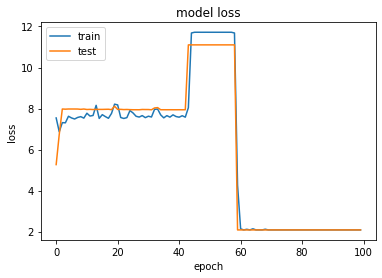

In [85]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [86]:
em=['happy','sad','neutral','angry']

In [87]:
classes_x = model.predict(x_testcnn)
predictions=np.argmax(classes_x,axis=1)

loss, acc = model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

5/5 [==============================] - 0s 16ms/step - loss: 2.0794 - accuracy: 0.2370
Restored model, accuracy: 23.70%


In [88]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

c:\users\avimo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\avimo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\avimo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

         0.0       0.24      1.00      0.38        32
         1.0       0.00      0.00      0.00        35
         3.0       0.00      0.00      0.00        26
         4.0       0.00      0.00      0.00        42

    accuracy                           0.24       135
   macro avg       0.06      0.25      0.10       135
weighted avg       0.06      0.24      0.09       135



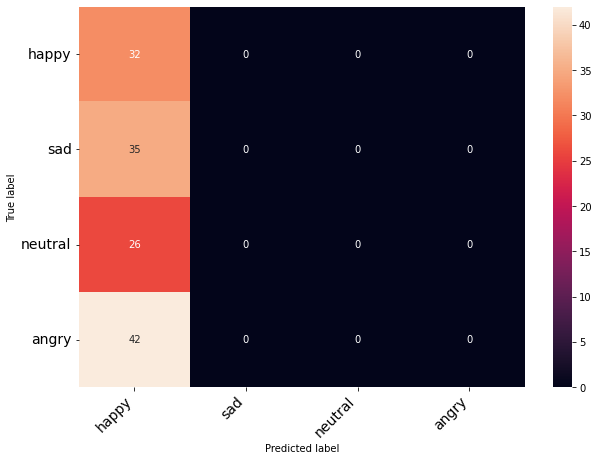

In [89]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

classes_x = model.predict(x_testcnn)
predictions=np.argmax(classes_x,axis=1)
#predictions = model.predict_classes(x_testcnn)
print(classification_report(y_test,predictions))
print_confusion_matrix(confusion_matrix(y_test,predictions),em)

In [90]:
filename = "data/ravdess/Actor_02/03-01-01-01-02-01-02.wav"
    # record the file (start talking)
    #record_to_file(filename)
    # extract features and reshape it
features = np.array(extract_feature(filename, mfcc=True, chroma=True, mel=True).reshape(1, -1))
    # predict
f=np.expand_dims(features,axis=2)
classes_pred = model.predict(f)
result=np.argmax(classes_pred,axis=1)

#result = model.predict_classes(f)[0]
    # show the result 
print("result :",em[result[0]-1])

<ipython-input-2-b0bf32e7cb3a>:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


result : angry


**Model 2: All Softmax** 

In [91]:


um = Sequential()

um.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
um.add(Activation('softmax'))
um.add(Dropout(0.25))
um.add(MaxPooling1D(pool_size=(8)))

um.add(Conv1D(128, 5,padding='same',))                  #2
um.add(Activation('softmax'))
um.add(MaxPooling1D(pool_size=(8)))
um.add(Dropout(0.25))

um.add(Conv1D(128, 5,padding='same',))                  #3
um.add(Activation('softmax'))
um.add(Dropout(0.25))

um.add(Flatten())
um.add(Dense(8))                                        #4                      
um.add(Activation('softmax'))
opt =tf.keras.optimizers.RMSprop(learning_rate=0.00005,epsilon=None,rho=0.9,decay=0.0)



In [73]:
um.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_21 (Conv1D)          (None, 180, 128)          768       
                                                                 
 activation_29 (Activation)  (None, 180, 128)          0         
                                                                 
 dropout_21 (Dropout)        (None, 180, 128)          0         
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 22, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_22 (Conv1D)          (None, 22, 128)           82048     
                                                                 
 activation_30 (Activation)  (None, 22, 128)           0         
                                                      

In [78]:
um.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [79]:
umhistory=um.fit(x_traincnn, y_train, batch_size=20, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
21/21 [==============================] - 3s 56ms/step - loss: 2.0747 - accuracy: 0.0596 - val_loss: 2.0745 - val_accuracy: 0.0000e+00
Epoch 2/100
21/21 [==============================] - 1s 46ms/step - loss: 2.0715 - accuracy: 0.1365 - val_loss: 2.0717 - val_accuracy: 0.0000e+00
Epoch 3/100
21/21 [==============================] - 1s 60ms/step - loss: 2.0689 - accuracy: 0.2109 - val_loss: 2.0690 - val_accuracy: 0.3111
Epoch 4/100
21/21 [==============================] - 1s 36ms/step - loss: 2.0655 - accuracy: 0.2854 - val_loss: 2.0664 - val_accuracy: 0.3111
Epoch 5/100
21/21 [==============================] - 1s 39ms/step - loss: 2.0632 - accuracy: 0.2878 - val_loss: 2.0637 - val_accuracy: 0.3111
Epoch 6/100
21/21 [==============================] - 1s 31ms/step - loss: 2.0601 - accuracy: 0.2779 - val_loss: 2.0610 - val_accuracy: 0.3111
Epoch 7/100
21/21 [==============================] - 1s 36ms/step - loss: 2.0573 - accuracy: 0.3052 - val_loss: 2.0583 - val_accuracy: 0.311

In [80]:

loss, acc = um.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

5/5 [==============================] - 0s 12ms/step - loss: 1.8442 - accuracy: 0.2370
Restored model, accuracy: 23.70%


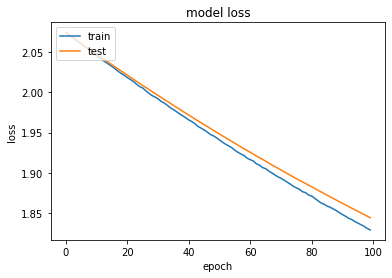

In [120]:
plt.plot(umhistory.history['loss'])
plt.plot(umhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [92]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
classes_pa = model.predict(x_testcnn)
prediction=np.argmax(classes_pa,axis=1)
#prediction = um.predict_classes(x_testcnn)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.24      1.00      0.38        32
         1.0       0.00      0.00      0.00        35
         3.0       0.00      0.00      0.00        26
         4.0       0.00      0.00      0.00        42

    accuracy                           0.24       135
   macro avg       0.06      0.25      0.10       135
weighted avg       0.06      0.24      0.09       135

[[32  0  0  0]
 [35  0  0  0]
 [26  0  0  0]
 [42  0  0  0]]


c:\users\avimo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\avimo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\avimo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

**Model 3: All Sigmoid**

In [96]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


tm = Sequential()

tm.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
tm.add(Activation('sigmoid'))
tm.add(Dropout(0.1))
tm.add(MaxPooling1D(pool_size=(8)))

tm.add(Conv1D(128, 5,padding='same',))                  #2
tm.add(Activation('sigmoid'))
tm.add(MaxPooling1D(pool_size=(8)))
tm.add(Dropout(0.1))

tm.add(Conv1D(128, 5,padding='same',))                  #3
tm.add(Activation('sigmoid'))
tm.add(Dropout(0.1))

tm.add(Flatten())
tm.add(Dense(8))                                        #4                      
tm.add(Activation('sigmoid'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005,epsilon=None,rho=0.9,decay=0.0)



In [97]:
tm.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_34 (Conv1D)          (None, 180, 128)          768       
                                                                 
 activation_46 (Activation)  (None, 180, 128)          0         
                                                                 
 dropout_33 (Dropout)        (None, 180, 128)          0         
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 22, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_35 (Conv1D)          (None, 22, 128)           82048     
                                                                 
 activation_47 (Activation)  (None, 22, 128)           0         
                                                     

In [98]:
tm.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [99]:
tmhistory=tm.fit(x_traincnn, y_train, batch_size=20, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
21/21 [==============================] - 3s 46ms/step - loss: 1.8588 - accuracy: 0.2333 - val_loss: 1.6968 - val_accuracy: 0.2370
Epoch 2/100
21/21 [==============================] - 1s 28ms/step - loss: 1.6556 - accuracy: 0.2804 - val_loss: 1.5683 - val_accuracy: 0.2370
Epoch 3/100
21/21 [==============================] - 1s 28ms/step - loss: 1.5546 - accuracy: 0.2680 - val_loss: 1.5084 - val_accuracy: 0.2370
Epoch 4/100
21/21 [==============================] - 1s 28ms/step - loss: 1.4651 - accuracy: 0.3275 - val_loss: 1.4673 - val_accuracy: 0.3111
Epoch 5/100
21/21 [==============================] - 1s 31ms/step - loss: 1.4272 - accuracy: 0.3052 - val_loss: 1.4592 - val_accuracy: 0.2370
Epoch 6/100
21/21 [==============================] - 1s 28ms/step - loss: 1.4262 - accuracy: 0.2928 - val_loss: 1.4423 - val_accuracy: 0.2148
Epoch 7/100
21/21 [==============================] - 1s 32ms/step - loss: 1.4028 - accuracy: 0.2928 - val_loss: 1.4308 - val_accuracy: 0.2593
Epoch 

In [100]:
loss, acc = tm.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

5/5 [==============================] - 0s 16ms/step - loss: 1.3163 - accuracy: 0.4296
Restored model, accuracy: 42.96%


In [50]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
classes_tp = model.predict(x_testcnn)
predict=np.argmax(classes_tp,axis=1)
#predict = tm.predict_classes(x_testcnn)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.50      0.69      0.58        32
         1.0       0.73      0.23      0.35        35
         3.0       0.45      0.92      0.61        26
         4.0       0.96      0.62      0.75        42

    accuracy                           0.59       135
   macro avg       0.66      0.61      0.57       135
weighted avg       0.69      0.59      0.58       135

[[22  1  8  1]
 [10  8 17  0]
 [ 0  2 24  0]
 [12  0  4 26]]


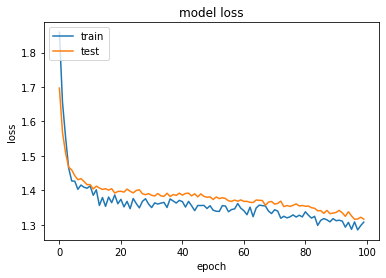

In [121]:
plt.plot(tmhistory.history['loss'])
plt.plot(tmhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model 4: 3 Sigmoids and 1 Relu for flattening layer**

In [103]:


sm = Sequential()

sm.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
sm.add(Activation('sigmoid'))
sm.add(Dropout(0.1))
sm.add(MaxPooling1D(pool_size=(8)))


sm.add(Conv1D(128, 5,padding='same',))                  #3
sm.add(Activation('sigmoid'))
sm.add(Dropout(0.1))

sm.add(Conv1D(128, 5,padding='same',))                  #4
sm.add(Activation('sigmoid'))
sm.add(Dropout(0.1))

sm.add(Flatten())
sm.add(Dense(8))                                        #5                     
sm.add(Activation('relu'))
opt = tf.keras.optimizers.RMSprop(lr=0.00005,epsilon=None,rho=0.9,decay=0.0)


In [104]:
sm.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_44 (Conv1D)          (None, 180, 128)          768       
                                                                 
 activation_59 (Activation)  (None, 180, 128)          0         
                                                                 
 dropout_43 (Dropout)        (None, 180, 128)          0         
                                                                 
 max_pooling1d_24 (MaxPoolin  (None, 22, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_45 (Conv1D)          (None, 22, 128)           82048     
                                                                 
 activation_60 (Activation)  (None, 22, 128)           0         
                                                     

In [105]:
sm.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [106]:
smhistory=sm.fit(x_traincnn, y_train, batch_size=20, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
21/21 [==============================] - 3s 51ms/step - loss: 6.4003 - accuracy: 0.2184 - val_loss: 5.2449 - val_accuracy: 0.2370
Epoch 2/100
21/21 [==============================] - 1s 33ms/step - loss: 5.8656 - accuracy: 0.2878 - val_loss: 5.1816 - val_accuracy: 0.2370
Epoch 3/100
21/21 [==============================] - 1s 33ms/step - loss: 5.7166 - accuracy: 0.2208 - val_loss: 5.1453 - val_accuracy: 0.2444
Epoch 4/100
21/21 [==============================] - 1s 40ms/step - loss: 5.8411 - accuracy: 0.2630 - val_loss: 7.6206 - val_accuracy: 0.3111
Epoch 5/100
21/21 [==============================] - 1s 40ms/step - loss: 7.4400 - accuracy: 0.3052 - val_loss: 7.2391 - val_accuracy: 0.3111
Epoch 6/100
21/21 [==============================] - 1s 39ms/step - loss: 3.8578 - accuracy: 0.2928 - val_loss: 2.0794 - val_accuracy: 0.2370
Epoch 7/100
21/21 [==============================] - 1s 34ms/step - loss: 2.5454 - accuracy: 0.2978 - val_loss: 2.0794 - val_accuracy: 0.2370
Epoch 

In [107]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
classes_x = model.predict(x_testcnn)
p=np.argmax(classes_x,axis=1)

#p = sm.predict_classes(x_testcnn)
print(classification_report(y_test,p))
print(confusion_matrix(y_test,p))

              precision    recall  f1-score   support

         0.0       0.24      1.00      0.38        32
         1.0       0.00      0.00      0.00        35
         3.0       0.00      0.00      0.00        26
         4.0       0.00      0.00      0.00        42

    accuracy                           0.24       135
   macro avg       0.06      0.25      0.10       135
weighted avg       0.06      0.24      0.09       135

[[32  0  0  0]
 [35  0  0  0]
 [26  0  0  0]
 [42  0  0  0]]


c:\users\avimo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\avimo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\avimo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [108]:
loss, acc = sm.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

5/5 [==============================] - 0s 15ms/step - loss: 2.0794 - accuracy: 0.2370
Restored model, accuracy: 23.70%


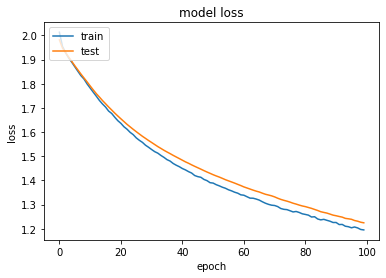

In [122]:
plt.plot(smhistory.history['loss'])
plt.plot(smhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model 4: 2 relu and 2 softmax**

In [114]:


sm4 = Sequential()

sm4.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
sm4.add(Activation('relu'))
sm4.add(Dropout(0.1))
sm4.add(MaxPooling1D(pool_size=(8)))


sm4.add(Conv1D(128, 5,padding='same',))                  #3
sm4.add(Activation('relu'))
sm4.add(Dropout(0.1))

sm4.add(Conv1D(128, 5,padding='same',))                  #4
sm4.add(Activation('softmax'))
sm4.add(Dropout(0.1))

sm4.add(Flatten())
sm4.add(Dense(8))                                        #5                     
sm4.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005,epsilon=None,rho=0.9,decay=0.0)


In [115]:
sm4.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_53 (Conv1D)          (None, 180, 128)          768       
                                                                 
 activation_71 (Activation)  (None, 180, 128)          0         
                                                                 
 dropout_52 (Dropout)        (None, 180, 128)          0         
                                                                 
 max_pooling1d_27 (MaxPoolin  (None, 22, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_54 (Conv1D)          (None, 22, 128)           82048     
                                                                 
 activation_72 (Activation)  (None, 22, 128)           0         
                                                     

In [116]:
sm4.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [124]:
sm4history=sm4.fit(x_traincnn, y_train, batch_size=20, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
21/21 [==============================] - 1s 39ms/step - loss: 1.1958 - accuracy: 0.4888 - val_loss: 1.2219 - val_accuracy: 0.4519
Epoch 2/100
21/21 [==============================] - 1s 41ms/step - loss: 1.1907 - accuracy: 0.4988 - val_loss: 1.2193 - val_accuracy: 0.4519
Epoch 3/100
21/21 [==============================] - 1s 38ms/step - loss: 1.1858 - accuracy: 0.5037 - val_loss: 1.2148 - val_accuracy: 0.4519
Epoch 4/100
21/21 [==============================] - 1s 38ms/step - loss: 1.1860 - accuracy: 0.5012 - val_loss: 1.2107 - val_accuracy: 0.4519
Epoch 5/100
21/21 [==============================] - 1s 38ms/step - loss: 1.1847 - accuracy: 0.4988 - val_loss: 1.2078 - val_accuracy: 0.4815
Epoch 6/100
21/21 [==============================] - 1s 37ms/step - loss: 1.1808 - accuracy: 0.4988 - val_loss: 1.2055 - val_accuracy: 0.4519
Epoch 7/100
21/21 [==============================] - 1s 42ms/step - loss: 1.1772 - accuracy: 0.4888 - val_loss: 1.2023 - val_accuracy: 0.4741
Epoch 

In [125]:
loss, acc = sm4.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

5/5 [==============================] - 0s 14ms/step - loss: 1.0441 - accuracy: 0.4815
Restored model, accuracy: 48.15%


In [ ]:
plt.plot(sm4history.history['loss'])
plt.plot(sm4history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model 4: 2 sigmoid and 2 softmax**

In [128]:

sm5 = Sequential()

sm5.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
sm4.add(Activation('sigmoid'))
sm5.add(Dropout(0.1))
sm5.add(MaxPooling1D(pool_size=(8)))


sm5.add(Conv1D(128, 5,padding='same',))                  #2
sm5.add(Activation('sigmoid'))
sm5.add(Dropout(0.1))

sm5.add(Conv1D(128, 5,padding='same',))                  #3
sm5.add(Activation('relu'))
sm5.add(Dropout(0.1))

sm5.add(Flatten())
sm5.add(Dense(8))                                        #4                    
sm5.add(Activation('relu'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005,epsilon=None,rho=0.9,decay=0.0)

sm5.summary()


sm5.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

sm5history=sm4.fit(x_traincnn, y_train, batch_size=20, epochs=100, validation_data=(x_testcnn, y_test))

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_56 (Conv1D)          (None, 180, 128)          768       
                                                                 
 dropout_55 (Dropout)        (None, 180, 128)          0         
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 22, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_57 (Conv1D)          (None, 22, 128)           82048     
                                                                 
 activation_76 (Activation)  (None, 22, 128)           0         
                                                                 
 dropout_56 (Dropout)        (None, 22, 128)           0         
                                                     

Epoch 44/100
21/21 [==============================] - 1s 34ms/step - loss: 0.9661 - accuracy: 0.5633 - val_loss: 1.0159 - val_accuracy: 0.4963
Epoch 45/100
21/21 [==============================] - 1s 35ms/step - loss: 0.9748 - accuracy: 0.5558 - val_loss: 1.0142 - val_accuracy: 0.4963
Epoch 46/100
21/21 [==============================] - 1s 35ms/step - loss: 0.9682 - accuracy: 0.5558 - val_loss: 1.0110 - val_accuracy: 0.4963
Epoch 47/100
21/21 [==============================] - 1s 36ms/step - loss: 0.9719 - accuracy: 0.5707 - val_loss: 1.0109 - val_accuracy: 0.4963
Epoch 48/100
21/21 [==============================] - 1s 36ms/step - loss: 0.9733 - accuracy: 0.5633 - val_loss: 1.0156 - val_accuracy: 0.5037
Epoch 49/100
21/21 [==============================] - 1s 36ms/step - loss: 0.9650 - accuracy: 0.5682 - val_loss: 1.0159 - val_accuracy: 0.5111
Epoch 50/100
21/21 [==============================] - 1s 37ms/step - loss: 0.9671 - accuracy: 0.5583 - val_loss: 1.0157 - val_accuracy: 0.5037

5/5 [==============================] - 0s 12ms/step - loss: 1.7281 - accuracy: 0.1926
Restored model, accuracy: 19.26%


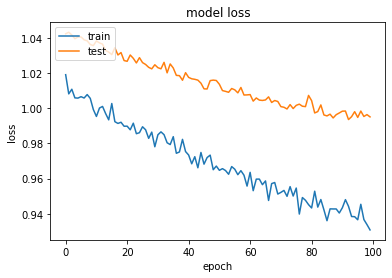

In [135]:
loss, acc = sm5.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

plt.plot(sm5history.history['loss'])
plt.plot(sm5history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model 5: 2 softmax and 2 relu**


In [137]:

sm6 = Sequential()

sm6.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
sm4.add(Activation('softmax'))
sm6.add(Dropout(0.1))
sm6.add(MaxPooling1D(pool_size=(8)))


sm6.add(Conv1D(128, 5,padding='same',))                  #2
sm6.add(Activation('softmax'))
sm6.add(Dropout(0.1))

sm6.add(Conv1D(128, 5,padding='same',))                  #3
sm6.add(Activation('relu'))
sm6.add(Dropout(0.1))

sm6.add(Flatten())
sm6.add(Dense(8))                                        #4                    
sm6.add(Activation('relu'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005,epsilon=None,rho=0.9,decay=0.0)

sm6.summary()


sm6.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

sm6history=sm6.fit(x_traincnn, y_train, batch_size=20, epochs=100, validation_data=(x_testcnn, y_test))

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_62 (Conv1D)          (None, 180, 128)          768       
                                                                 
 dropout_61 (Dropout)        (None, 180, 128)          0         
                                                                 
 max_pooling1d_30 (MaxPoolin  (None, 22, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_63 (Conv1D)          (None, 22, 128)           82048     
                                                                 
 activation_84 (Activation)  (None, 22, 128)           0         
                                                                 
 dropout_62 (Dropout)        (None, 22, 128)           0         
                                                     

Epoch 44/100
21/21 [==============================] - 1s 38ms/step - loss: 2.0794 - accuracy: 0.3027 - val_loss: 2.0794 - val_accuracy: 0.2370
Epoch 45/100
21/21 [==============================] - 1s 37ms/step - loss: 2.0794 - accuracy: 0.3027 - val_loss: 2.0794 - val_accuracy: 0.2370
Epoch 46/100
21/21 [==============================] - 1s 33ms/step - loss: 2.0794 - accuracy: 0.3027 - val_loss: 2.0794 - val_accuracy: 0.2370
Epoch 47/100
21/21 [==============================] - 1s 34ms/step - loss: 2.0794 - accuracy: 0.3027 - val_loss: 2.0794 - val_accuracy: 0.2370
Epoch 48/100
21/21 [==============================] - 1s 33ms/step - loss: 2.0794 - accuracy: 0.3027 - val_loss: 2.0794 - val_accuracy: 0.2370
Epoch 49/100
21/21 [==============================] - 1s 40ms/step - loss: 2.0794 - accuracy: 0.3027 - val_loss: 2.0794 - val_accuracy: 0.2370
Epoch 50/100
21/21 [==============================] - 1s 41ms/step - loss: 2.0794 - accuracy: 0.3027 - val_loss: 2.0794 - val_accuracy: 0.2370

5/5 [==============================] - 0s 10ms/step - loss: 2.0794 - accuracy: 0.2370
Restored model, accuracy: 23.70%


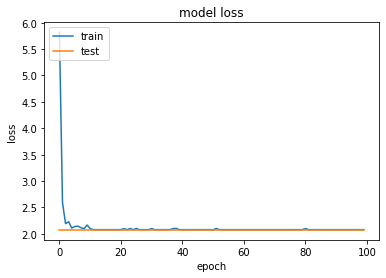

In [142]:
loss, acc = sm6.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

plt.plot(sm6history.history['loss'])
plt.plot(sm6history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model 5: 2 softmax and 2 relu**



In [29]:

sm7 = Sequential()

sm7.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
sm7.add(Activation('tanh'))
sm7.add(Dropout(0.1))
sm7.add(MaxPooling1D(pool_size=(8)))


sm7.add(Conv1D(128, 5,padding='same',))                  #2
sm7.add(Activation('tanh'))
sm7.add(Dropout(0.1))

sm7.add(Conv1D(128, 5,padding='same',))                  #3
sm7.add(Activation('relu'))
sm7.add(Dropout(0.1))

sm7.add(Flatten())
sm7.add(Dense(8))                                        #4                    
sm7.add(Activation('relu'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005,epsilon=None,rho=0.9,decay=0.0)

sm7.summary()


sm7.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

sm7history=sm7.fit(x_traincnn, y_train, batch_size=20, epochs=100, validation_data=(x_testcnn, y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 180, 128)          768       
                                                                 
 activation (Activation)     (None, 180, 128)          0         
                                                                 
 dropout_2 (Dropout)         (None, 180, 128)          0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 22, 128)          0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 22, 128)           82048     
                                                                 
 activation_1 (Activation)   (None, 22, 128)           0         
                                                      

Epoch 43/100
21/21 [==============================] - 1s 31ms/step - loss: 2.2616 - accuracy: 0.3226 - val_loss: 2.1380 - val_accuracy: 0.2370
Epoch 44/100
21/21 [==============================] - 1s 38ms/step - loss: 2.1401 - accuracy: 0.3102 - val_loss: 2.0794 - val_accuracy: 0.2370
Epoch 45/100
21/21 [==============================] - 1s 38ms/step - loss: 2.0860 - accuracy: 0.3151 - val_loss: 2.0794 - val_accuracy: 0.2370
Epoch 46/100
21/21 [==============================] - 1s 60ms/step - loss: 2.0691 - accuracy: 0.3077 - val_loss: 2.0794 - val_accuracy: 0.2370
Epoch 47/100
21/21 [==============================] - 1s 37ms/step - loss: 2.1233 - accuracy: 0.3002 - val_loss: 2.0794 - val_accuracy: 0.2370
Epoch 48/100
21/21 [==============================] - 1s 51ms/step - loss: 2.0743 - accuracy: 0.3052 - val_loss: 2.0794 - val_accuracy: 0.2370
Epoch 49/100
21/21 [==============================] - 1s 42ms/step - loss: 2.0691 - accuracy: 0.3077 - val_loss: 2.0794 - val_accuracy: 0.2370

21/21 [==============================] - 1s 33ms/step - loss: 2.0794 - accuracy: 0.3027 - val_loss: 2.0794 - val_accuracy: 0.2370


5/5 [==============================] - 0s 13ms/step - loss: 2.0794 - accuracy: 0.2370
Restored model, accuracy: 23.70%


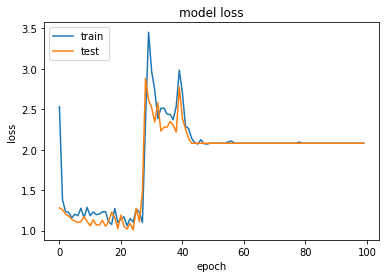

In [31]:
loss, acc = sm7.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

plt.plot(sm7history.history['loss'])
plt.plot(sm7history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()